# SUPERVISED CLASSIFICATION ALGORITHMS

**CONTENTS**

- [Exploratory Data Analysis (Example dataset)](#eda)
- [Simple Classification Algorithms](#simple_classification)
    + [Naive Bayes Classifier](#bayes)
    + [Support Vector Machine SVMs](#SVC)
    + [Decision Tree](#decision_tree)
    + [k-nearest neigbors](#k_nearest)
- [Essembles](#essembles)
    + [Random forest](#random_forest) (ensemble methods: meta classifiers built from (usually) decision trees)
    + [Adaboost](#adaboost) (ensemble methods: meta classifiers built from (usually) decision trees)
    + [Gradient Boosting](#gradient_boost)
- [Model Training](#models)
- [Hyperparameter Tuning](#tuning)

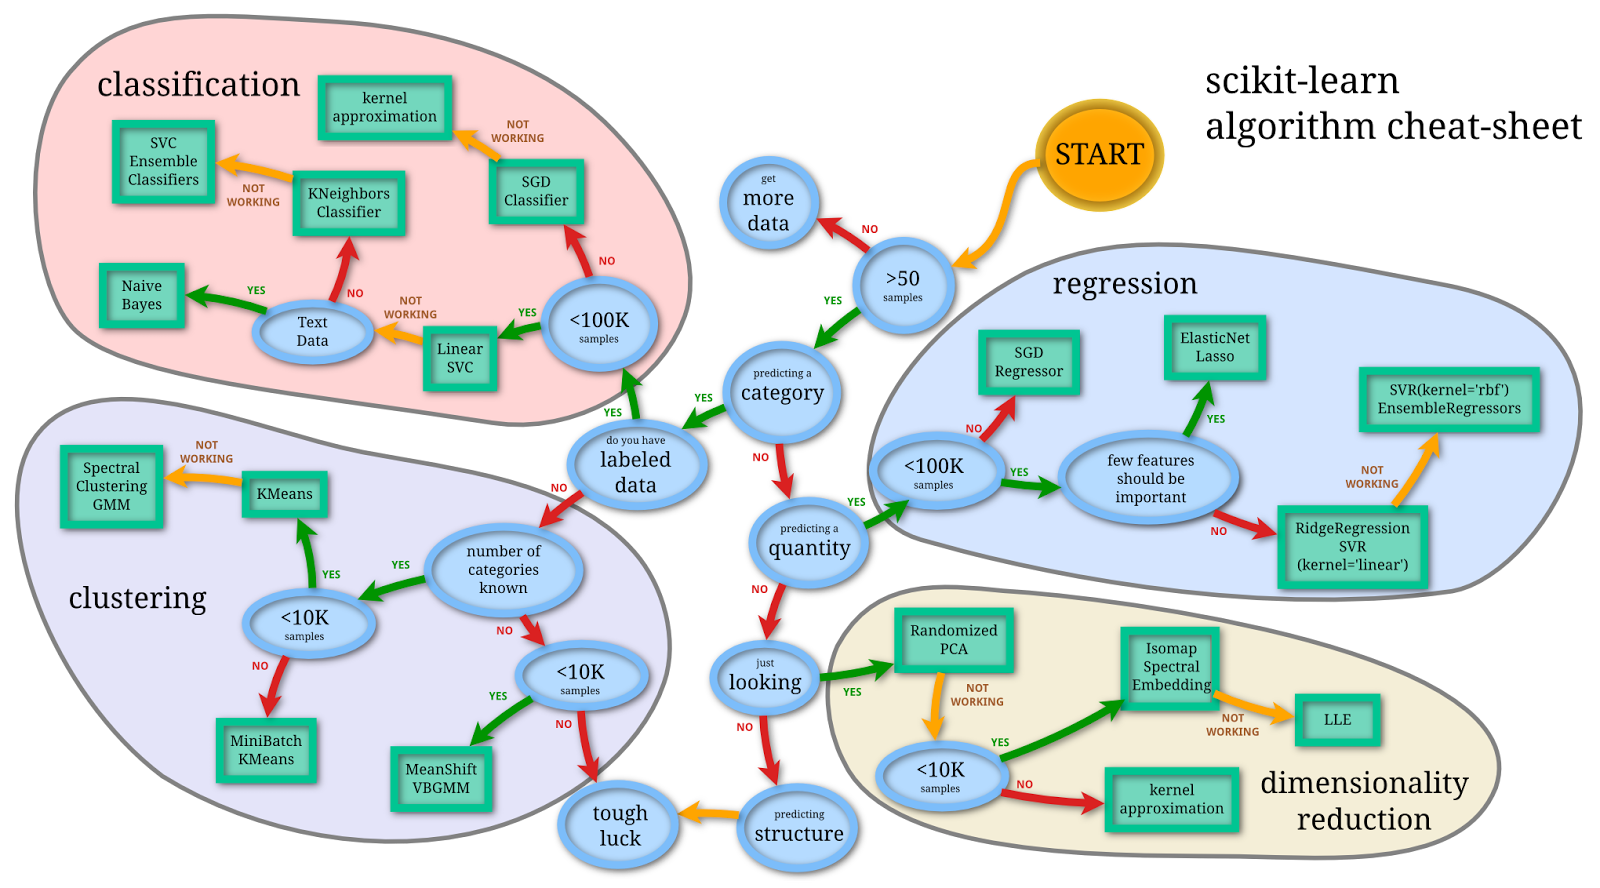

In [516]:
from IPython.display import Image
Image("img/ML_cheat_sheet.png")

<a id='EDA'></a>
# 0. SIMPLE CASE STUDY FOR CLASSIFICATION

## 0.1. CASE STUDY DESCRIPTION
- Predict admission result for students based on the 2 test scores they have.
- Input file: "college_admission.txt" 
- Data format: multiple line, each line contains 2 float numbers and the final int number (0 or 1) separated by ",":
    + Example: `"34.62365962451697,78.0246928153624,0"`
    + First column: score 1
    + Second column: score 2
    + Last column: admission result (0: no admitted, 1: admitted)

In [517]:
### Load the data
with open ("data/college_admission.txt") as f:
    X, y, count = [], [], 0
    while f.readline():
        x = f.readline()
        try:
            x1, x2, yi = x.split("\n")[0].split(",")
            X.append([float(x1), float(x2)])
            y.append(int(yi))
            count += 1
        except:
            print("Parsing error. Line: ", count)
    print(len(X), len(y))

50 50


## 0.2. EXPLORATORY DATA ANALYSIS (EDA) FOR THE DATA


### 0.2.1. GENERAL ABOUT THE DATA

In [518]:
import seaborn as sns
import matplotlib.pyplot as plt

In [519]:
### split train/test set
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

40 10 40 10


In [520]:
df = pd.DataFrame(X, columns = ['Score1', 'Score2'])
df['Admission'] = y
df.head()

,Score1,Score2,Admission
0,30.286711,43.894998,0
1,60.182599,86.308552,1
2,45.083277,56.316372,0
3,75.024746,46.554014,1
4,84.432820,43.533393,1


In [521]:
df.isnull().sum()

Score1       0
Score2       0
Admission    0
dtype: int64

In [522]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score1,50.0,65.912953,20.472637,30.058822,51.672141,66.653807,82.333231,99.827858
Score2,50.0,63.817074,17.926255,30.603263,47.159376,60.880450,78.348094,97.718692
Admission,50.0,0.580000,0.498569,0.000000,0.000000,1.000000,1.000000,1.000000


### 0.2.2. SINGLE VARIABLE ANALYSIS

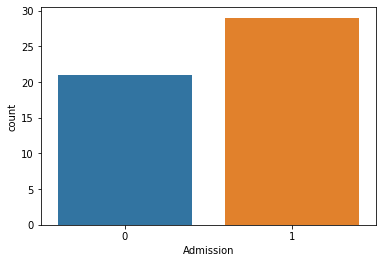

In [523]:
### To check if the target feature is balanced or not => okay
sns.countplot(df['Admission'])
plt.show()

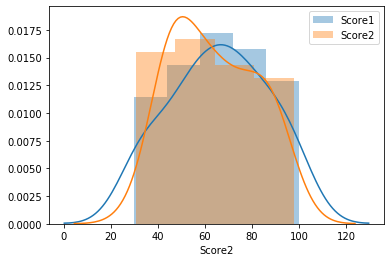

In [524]:
### displot => Check for the density of the data (lies in range 30 - 100)
sns.distplot(df['Score1'])
sns.distplot(df['Score2'])
plt.legend(['Score1', 'Score2'])
plt.show()

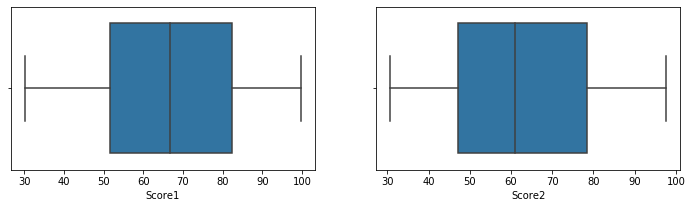

In [525]:
### boxplot => Check if data has outliers or not
fig = plt.figure(figsize = (12,3))
fig.add_subplot(1,2,1)
sns.boxplot(df['Score1'])
fig.add_subplot(1,2,2)
sns.boxplot(df['Score2'])
plt.show()
## => No outliers in this data

### 0.2.3. MULTIPLE VARIABLE ANALYSIS

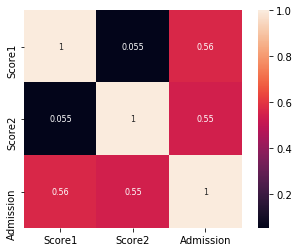

In [526]:
### Check correlation among data
corr = df.corr()
sns.heatmap(corr, square = True, annot = True, annot_kws = {'size':8})
plt.show()
# => no correlation between Score1 and Score2

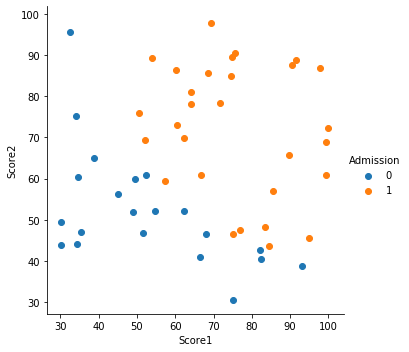

In [527]:
g = sns.FacetGrid(data = df, hue = 'Admission', height = 5) # Height (in inches) of each facet.
g.map(plt.scatter, "Score1", "Score2")
g.add_legend()
plt.show()

<a id='simple_classification'></a>
# 1. SIMPLE CLASSIFICATION ALGORITHMS

<a id='bayes'></a>
## 1.1. NAIVE BAYES CLASSIFIER

- Supervised Classification: Simple probabilistic classfiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. The goal is to draw a decision boundary to classify data into different classes.
- Advantage: simple, efficient
- Weakness: "naive"

- One particular feature of Naive Bayes is that it’s a good algorithm for working with text classification.

- Example: Classify the emails as written by one person or the other based only on the text of the email. "Naive": only care about the word, not the order of the words.
- [Good reference](https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf)

In [528]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
## initialize the classifier
clf = GaussianNB()
## fit the data
clf.fit(X_train, y_train)
#predict the data
y_pred = clf.predict(X_test)
### 2 ways to calculate the accuracy score
# sklearn metrics
print("Accuracy score of the prediction", accuracy_score(y_test, y_pred))
# model attribute
clf.score(X_test, y_test)

Accuracy score of the prediction 0.9


0.9

#### Draw the decision boundary for the training data
- Using the `mlxtend` library, a Python machine learning extension.
- [Reference for mlxtend library](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/)

In [529]:
def divideX_test_accordingto_label(X_test, y_test):
    """ Separate X_test according to its label (0 or 1)
    """
    X_label0, X_label1 = [], []
    for x, y in zip(X_test, y_test):
        if y == 1:
            X_label1.append(list(x))
        else:
            X_label0.append(list(x))
    return np.array(X_label0), np.array(X_label1)

X_label0, X_label1 = divideX_test_accordingto_label(X_test, y_test)
print(X_label0.shape, X_label1.shape)

(5, 2) (5, 2)


In [530]:
#### the position Xi that has a wrong prediction
for i in range(len(y_pred)):
    if not y_pred[i] == y_test[i]:
        print(X_test[i])

[32.57720017 95.59854761]


In [531]:
#!pip install mlxtend
def plotClassificationResult(X_train, y_train, X_test, y_test, clf):
    """ Plot the decision boundary and all the data points from train and test dataset"""
    X_label0, X_label1 = divideX_test_accordingto_label(X_test, y_test)
    from mlxtend.plotting import plot_decision_regions
    plot_decision_regions(X = X_train, y = y_train, clf = clf, legend = 2)
    plt.scatter(x = X_label0[:,0], y = X_label0[:,1], color = "blue")
    plt.scatter(x = X_label1[:,0], y = X_label1[:,1], color = "red")
    plt.xlabel("Score 1")
    plt.ylabel("Score 2")
    plt.show()

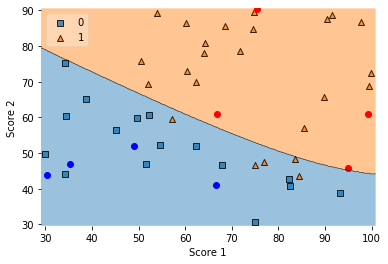

In [532]:
plotClassificationResult(X_train, y_train, X_test, y_test, clf)

In [535]:
from sklearn.metrics import plot_precision_recall

ImportError: cannot import name 'plot_precision_recall' from 'sklearn.metrics' (/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

<a id='SVC'></a>
## 1.2. SUPPORT VECTOR MACHINE

- **Margin**: Maximize the distance to the nearest point of either of the two classes.
=> SVM decision boundary
- Use sklearn package: https://scikit-learn.org/stable/modules/svm.html
- Default: sklearn.svm.SVC(kernel = 'rbf', C = 1.0, gamma = 'scale')
- In general, SVM is MUCH slower to train and use for predicting.

### Important parameters in SVM

##### Kernel function:  

- Take low dimensional feature space (x,y) and transform to very high dimensional space (x1, x2, ... xn) => solve the problem and convert it back to the original dimensional space => non-linear separation.
- **Kernel function** could be linear, poly, sigmoid, rbf ("crazy" curve), precomputed, etc.

##### C parameter: 

- Control tradeoff between smooth decision boundary and classifying training points correctly.
- Larger C: more training points correct, more complex boundary.

##### Gamma parameter:
- Define how far the influence of a single training example reaches.
        + "scale": each training value has a far reach (lower values: 1/(n_features*X.var())
        (low value of gamma: the points near the decision boundary have low weight => consider more the farther points => the boundary is more linear, more smoother.
        + "auto":  each training value has a close reach (higher values: 1/(n_features])

In [432]:
from sklearn import svm
## initialize the classifier
clf = svm.SVC(kernel = "linear", gamma = "auto")
## fit the data
clf = clf.fit(X_train, y_train)
#predict the data
y_pred = clf.predict(X_test)
print("Accuracy score of the prediction", accuracy_score(y_test, y_pred))

Accuracy score of the prediction 0.9


In [433]:
X.var()

363.933130017467

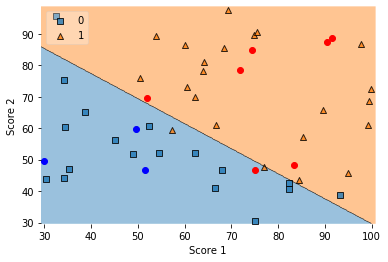

In [434]:
plotClassificationResult(X_train, y_train, X_test, y_test, clf)

<a id='decision_tree'></a>
## 1.3. DECISION TREES

- One of the oldest and most used elements in ML.
- Extremely robust.
- Allow to ask multiple linear questions, one after another.
- **Weakness**: 
    + prone to overfitting if the data has a lot of features
    + one of the easiest ways to get an overfit decision tree is to use a small training set and lots of features.
    
### Important parameters in Decision Trees

##### min_samples_split:  
    + default = 2
    + the minimum number of samples at the leaves of the decision tree (cannot split further)
    + the smaller the min_samples_split, the higher rish of overfitting

##### criterion: 
    + default = "gini"
    + The function to measure the quality of a split (measure of impurity in a bunch of examples).
    + "gini": The Gini impurity
    + "entropy": controls how a decision tree decides where to split the data
        o entropy = 0: all examples are same class
        o entropy = 1: examples are evenly split between classes
##### number of feature in X_train:
    + The large number of features give you a more complex decision tree.


In [435]:
from sklearn import tree
## initialize the classifier
clf = tree.DecisionTreeClassifier()
## fit the data
clf = clf.fit(X_train, y_train)
#predict the data
y_pred = clf.predict(X_test)
print("Accuracy score of the prediction", accuracy_score(y_test, y_pred))

Accuracy score of the prediction 0.9


In [438]:
clf.score(X_test, y_test)

0.9

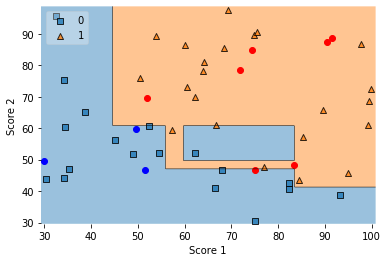

In [436]:
plotClassificationResult(X_train, y_train, X_test, y_test, clf)

#### Get a list of the relative importance of all the features being used using the attribute `feature_importances_`

In [437]:
clf.feature_importances_

array([0.45959596, 0.54040404])

<a id='k_nearest'></a>
## 1.4. K- NEAREST NEIGHBORS

- classic, simple, easy to understand
- **How k-nearest neighbors work:**
    + Determine k value: default k = 5
    + Calculate the distance of new data with training data, default = Euclidean distance.
    + Find the k-nearest neigbors.
    + Classify new data: select the class of the training data that closest to the new data with the highest quantity.
=> prediction takes longer time than training time.    

### Important parameters in k-nearest neighbors

#####  n_neighbors
    + default = 5
    + can tune with `n_neighbors = list(range(1, 30))`
    
#####  leaf_size
    + default = 30
    + can tune with `leaf_sizes = list(range(1, 50))`
    
##### weights
    + default = ‘uniform’
    +  uniform weights: All points in each neighborhood are weighted equally.
    + ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

#####  p, Minkowski metric - used to calculate the distance
    + default p = 2: euclidean distance
    + can tune with p = [1, 2] (1: manhattan distance)
    
   **USE CASE for each distance**: 
   + manhattan distance: works for points in grid, not the geometric distance. Example: chess dataset, the distance between houses which are few blocks apart, input features are not similar in type (age, gender, height). It is also applied in the high number of dimensions, which leads to [the curse of dimension](https://analyticsindiamag.com/curse-of-dimensionality-and-what-beginners-should-do-to-overcome-it/).
   + euclidean distance: the shortest/minimun distance between 2 points.
   

In [375]:
from sklearn.neighbors import KNeighborsClassifier
## initialize the classifier
clf = KNeighborsClassifier(n_neighbors = 3)
## fit the data
clf = clf.fit(X_train, y_train)
#predict the data
y_pred = clf.predict(X_test)
print("Accuracy score of the prediction", accuracy_score(y_test, y_pred))

Accuracy score of the prediction 0.9


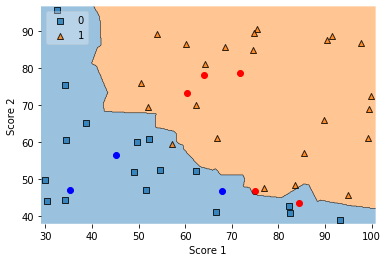

In [376]:
plotClassificationResult(X_train, y_train, X_test, y_test, clf)

<a id='essembles'></a>
# 2. ESSEMBLES

- Meta estimator that combines predictions from multiple separate models.
- 2 most common methods of essembles:
    + **Bagging**: reduce the chance overfitting complex models by using complex base models and tries to "smooth out" the predictions.
    + **Boosting**: Leaning from the mistake - improve the predictive flexibility of simple models by using simple base models and tries to "boost" their aggregate complexity. 
- [Example of Essembles on the tree models](https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725):
    + Bagging using decision tree models: Random forests
    + Boosting using decision tree models: Bossted trees

<a id='random_forest'></a>
## 2.1. RANDOM FOREST

- A meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
- A bagging essembles method.
- For each candidate in the test set, each individual tree predicts the records/candidates in the test set, independently. Random Forest uses the class (e.g. cat or dog) with the majority vote as this candidate’s final prediction.
- 2 sources of "randomness":
    + each tree is only allowed to choose from a random subset of features => feature selection
    + each tree is only trained on a random subset of observation => resampling.

- Strength:
    + Perform very well
    + Don't have many complicated parameters to tune.
    
### Important parameters in 

#####  n_estimators: number of trees in the forest
    + default = 100
    + can tune with n_estimators = list(range(200, 2200, 200))
##### max_features: max number of features considered for spliting the node
    + default = 'auto', max_features = sqrt(n_features)
    + can tune with max_features = ['auto', None], None: max_features = n_features
##### max_depth: max number of levels in each decision tree
    + default = None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    + can tune with max_depth = list(range(10, 120, 10))
##### min_samples_split: min number of data points placed in a node before the node is split
    + default = 2
    + can tune with min_samples_split = [2, 5, 10]
##### min_samples_leaf: min number of data points allowed in a leaf node
    + default = 1
    + can tune with min_samples_leaf = [1, 2, 4]
##### bootstrap: method for sampling data points
    + Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    + default = True
    + can tune with bootstrap = [True, False]

In [385]:
from sklearn.ensemble import RandomForestClassifier

In [387]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy score of the prediction", accuracy_score(y_test, y_pred))

Accuracy score of the prediction 1.0


/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


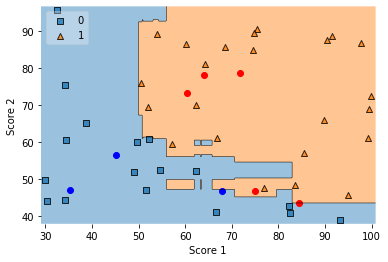

In [388]:
plotClassificationResult(X_train, y_train, X_test, y_test, clf)

<a id='adaboost'></a>
## 2.2. ADABOOST

- AdaBoost (Adaptive Boosting)
- A meta estimator (an ensemble learning method).
- An iterative approach to learn from the mistakes of weak classifiers (misclassification data points), and turn them into strong ones by updating weights of wrongly classified points.
- Begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

### Important parameters in AdaBoost

- The AdaBoost classifier has only one parameter of interest: the number of base estimators, or decision trees.

#####  n_estimators
    + default = 50
    + can tune with n_estimators = [50, 100, 200]

In [395]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy score of the prediction", accuracy_score(y_test, y_pred))

Accuracy score of the prediction 0.9


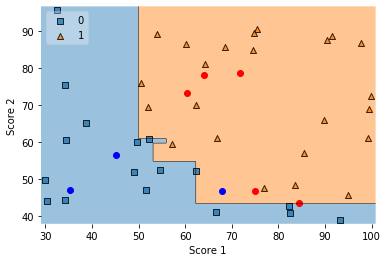

In [396]:
plotClassificationResult(X_train, y_train, X_test, y_test, clf)

<a id='gradient_boost'></a>
## 2.3. GRADIENT BOOSTING

- A boosting method: learn from the mistakes through residual error.
- How Gradient Boost learns:
    tree1.fit(Dataset) => residual_error1 = y_train - tree1.predict(X_train)
    => tree2.fit(residual_error1) => residual_error2 = y_train - tree2.predict(X_train)
- The Gradient Boosting makes a new prediction by simply adding up the predictions (of all trees).

### Important parameters in AdaBoost

- The AdaBoost classifier has only one parameter of interest: the number of base estimators, or decision trees.

#####  n_estimators
    + default = 50
    + can tune with n_estimators = [50, 100, 200]

In [447]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators = 200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy score of the prediction", accuracy_score(y_test, y_pred))

Accuracy score of the prediction 0.8


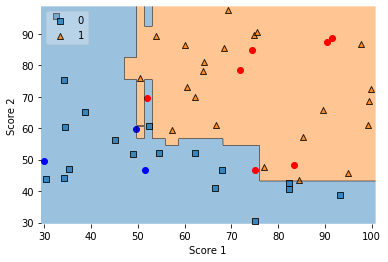

In [448]:
plotClassificationResult(X_train, y_train, X_test, y_test, clf)

<a id='models'></a>
# 3. MODEL TRAINING

Train and pick the best model with good accuracy using the make_moons dataset from sklearn.

In [454]:
### Load and create the dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 10000, noise = .5, random_state = 0)
X.shape

(10000, 2)

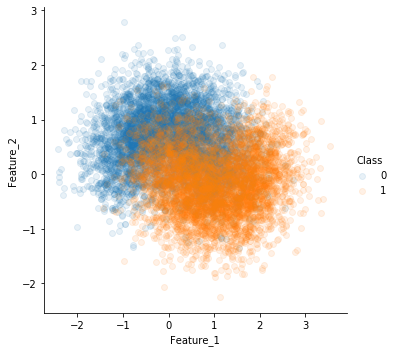

In [465]:
### Visualization using seaborn
# Prepare dataframe
moon_df = pd.DataFrame(X, columns = ['Feature_1', 'Feature_2'])
moon_df['Class'] = y
# Plot
g = sns.FacetGrid(data = moon_df, hue = 'Class', height = 5) # Height (in inches) of each facet.
g.map(plt.scatter, "Feature_1", "Feature_2", alpha = .1)
g.add_legend()
plt.show()

In [485]:
from sklearn import tree
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

def fitModels(X, y):
    """ Create and train the data using different ML models
    Print out all the accuracy of each model
    Return a list of model for plotting
    """
    models = []
    #### Prepare the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    #### Naive Bayes
    model_name = "Naive Bayes"
    clf = GaussianNB()
    clf = clf.fit(X_train, y_train)
    models.append([model_name, clf])
    print("{} - Accuracy score: {}".format(model_name,\
                                accuracy_score(y_test, clf.predict(X_test))))
    
    #### support vector machine
    model_name = "Support Vector Machine"
    clf = svm.SVC(kernel = "linear", gamma = "auto")
    clf = clf.fit(X_train, y_train)
    models.append([model_name, clf])
    print("{} - Accuracy score: {}".format(model_name,\
                                accuracy_score(y_test, clf.predict(X_test))))
    
    #### k-nearest neighbor
    model_name = "K-nearest Neighbor"
    clf = KNeighborsClassifier(n_neighbors = 2)
    clf = clf.fit(X_train, y_train)
    models.append([model_name, clf])
    print("{} - Accuracy score: {}".format(model_name,\
                                accuracy_score(y_test, clf.predict(X_test))))
    
    #### Decision tree
    model_name = "Decision Tree"
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    models.append([model_name, clf])
    print("{} - Accuracy score: {}".format(model_name,\
                                accuracy_score(y_test, clf.predict(X_test))))
    #### Random forest
    model_name = "Random Forest"
    clf = ensemble.RandomForestClassifier(n_estimators = 100)
    clf = clf.fit(X_train, y_train)
    models.append([model_name, clf])
    print("{} - Accuracy score: {}".format(model_name,\
                                accuracy_score(y_test, clf.predict(X_test))))
    #### AdaBoost
    model_name = "AdaBoost"
    clf = ensemble.AdaBoostClassifier(n_estimators = 100)
    clf = clf.fit(X_train, y_train)
    models.append([model_name, clf])
    print("{} - Accuracy score: {}".format(model_name,\
                                accuracy_score(y_test, clf.predict(X_test))))
    #### GradientBoost
    model_name = "Gradient Boosting"
    clf = ensemble.GradientBoostingClassifier(n_estimators = 100)
    clf = clf.fit(X_train, y_train)
    models.append([model_name, clf])
    print("{} - Accuracy score: {}".format(model_name,\
                                accuracy_score(y_test, clf.predict(X_test))))
    return models

In [486]:
models = fitModels(X, y)

Naive Bayes - Accuracy score: 0.8095
Support Vector Machine - Accuracy score: 0.8115
K-nearest Neighbor - Accuracy score: 0.762
Decision Tree - Accuracy score: 0.757
Random Forest - Accuracy score: 0.7955
AdaBoost - Accuracy score: 0.833
Gradient Boosting - Accuracy score: 0.8335


In [489]:
def divideX_test_accordingto_label(X_test, y_test):
    """ Separate X_test according to its label (0 or 1)
    Helper function for plotClassificationResults
    """
    X_label0, X_label1 = [], []
    for x, y in zip(X_test, y_test):
        if y == 1:
            X_label1.append(list(x))
        else:
            X_label0.append(list(x))
    return np.array(X_label0), np.array(X_label1)

In [494]:
from mlxtend.plotting import plot_decision_regions
def plotClassificationResults(X_train, y_train, X_test, y_test, models):
    """ Plot the decision boundary and all the data points from train and test dataset
    in different model
    """
    X_label0, X_label1 = divideX_test_accordingto_label(X_test, y_test)
    plt.figure(figsize = (12, 18))
    for i in range(len(models)):
        plt.subplot(4,2,i+1)
        plot_decision_regions(X = X_train, y = y_train, clf = models[i][1], legend = 2)
        plt.scatter(x = X_label0[:,0], y = X_label0[:,1], color = "blue", alpha = .5)
        plt.scatter(x = X_label1[:,0], y = X_label1[:,1], color = "red", alpha = .5)
        plt.xlabel("Score 1")
        plt.ylabel("Score 2")
        plt.gca().set_title('{}'.format(models[i][0]))
    plt.show()

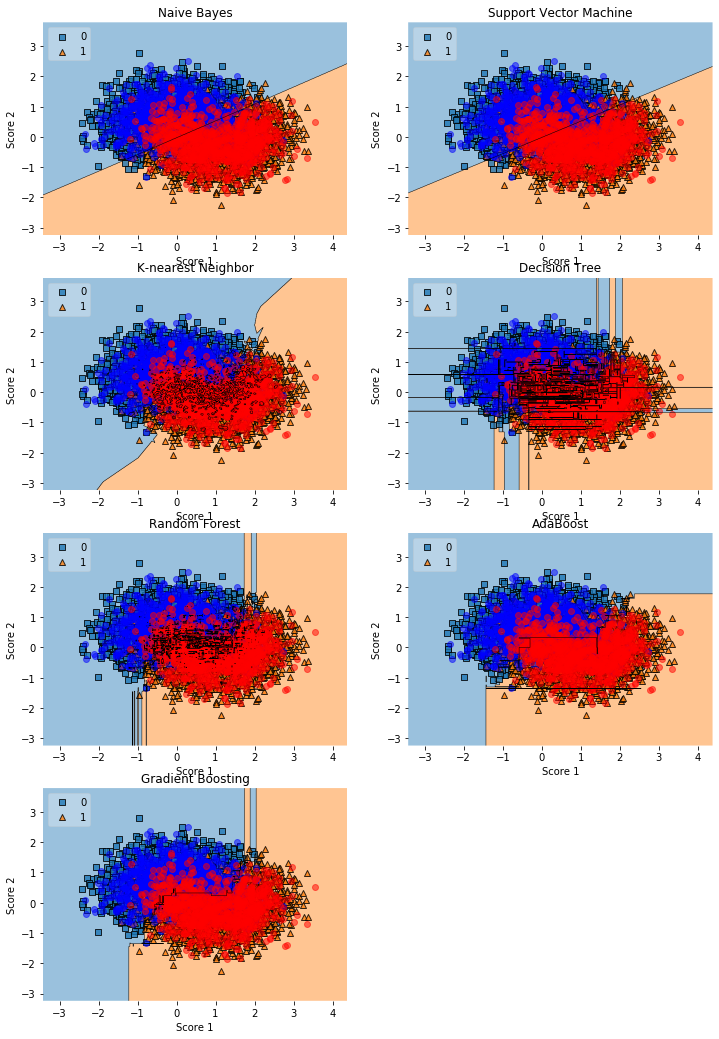

In [495]:
plotClassificationResults(X_train, y_train, X_test, y_test, models)

<a id='tuning'></a>
# 4. HYPERPARAMETER TUNING

- Using GridSearch
- For hyperparameter tuning, perform the fitting and evaluation  using different model settings to choose the best one.

### Important parameters for GridSearchCV

#####  cv: cross-validation generator or an iterable
    + default = None
    + Split the training set into K number of subset, called folds. Then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluate the Kth fold (validation data). 
    + example: k = 5
        o 1st iteration: train on fold 1-4, evaluate on the 5th
        o 2nd iteration: train on 1, 2, 3, 5, evaluate on the 4th,
        o and so on.
        o => average the performance of each of the fold => final validation metrics for the model.

In [366]:
from sklearn.model_selection import GridSearchCV

In [367]:
### Using k-nearest neighbors as the example model for gridsearch

hyperparameters = dict(leaf_size = list(range(1,50)),
                      n_neighbors = list(range(1,30)),
                      p = [1,2])
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, hyperparameters, cv = 10)
best_model = clf.fit(X_train, y_train)

/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [368]:
### Print the best model
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}